# Car Price Prediction Project

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

In [205]:
#Let's import the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [206]:
#reading the csv file
cars=pd.read_csv('carsdata.csv')

In [207]:
cars

,Unnamed: 0,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,0,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"16,089",2,bengaluru,"3,90,099"
1,1,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"15,548",1,bengaluru,"4,19,299"
2,2,hyundai,Hyundai Santro Xing,GL PLUS,2011,Petrol,Manual,"10,252",1,bengaluru,"2,94,199"
3,3,hyundai,Hyundai Grand i10,ASTA 1.2 AT VTVT,2014,Petrol,Automatic,"21,727",1,bengaluru,"5,29,299"
4,4,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2012,Petrol,Manual,"43,142",1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...,...
5863,5863,skoda,Skoda Yeti,AMBITION 2.0 TDI 4X2,2012,Diesel,Manual,"1,08,981",2,chandigarh,"3,66,499"
5864,5864,skoda,Skoda Rapid,1.6 TDI MT AMBITION PLUS,2014,Diesel,Manual,"1,38,328",1,chandigarh,"3,61,999"
5865,5865,skoda,Skoda Rapid,AMBITION 1.6 MPI MT PLUS,2014,Petrol,Manual,"1,34,412",1,chandigarh,"3,24,299"
5866,5866,skoda,Skoda Rapid,1.5 TDI AT STYLE PLUS,2017,Diesel,Automatic,"1,37,938",1,chandigarh,"5,61,999"


In [208]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5868 non-null   int64 
 1   Brands             5868 non-null   object
 2   Model              5868 non-null   object
 3   Variant            5868 non-null   object
 4   Make Year          5868 non-null   int64 
 5   Fuel               5868 non-null   object
 6   Transmission       5641 non-null   object
 7   Driven Kilometers  5868 non-null   object
 8   Owners             5868 non-null   int64 
 9   Location           5868 non-null   object
 10  Price              5868 non-null   object
dtypes: int64(3), object(8)
memory usage: 504.4+ KB


### Feature description

#### 1. Brands 
Name of the company car belongs to

#### 2. Model
Name of the car model

#### 3. Variant
Model variant the car has

#### 4. Make year
The year car was made

#### 5. Fuel
Type of fuel the car used

#### 6. Transmission
Whether the car has automatic or manual transmission

#### 7. Driven kilometers
Number of kilometers the car has run

#### 8. Owners
Number of owners the car has been sold to

#### 9. Location
Location from the used car belongs to

#### 10. Price
This is our traget variable which we needs to predict, the price of the car

Lets observe each columns and understand the cleaning required on the dataset

In [209]:
cars['Brands'].unique()

array(['hyundai', 'renault', 'mahindra', 'toyota', 'audi', 'honda',
       'maruti', 'tata', 'ford', 'skoda'], dtype=object)

Brands columns looks fine

In [210]:
cars['Model'].unique()

array(['Hyundai i10', 'Hyundai Santro Xing', 'Hyundai Grand i10',
       'Hyundai Eon', 'Hyundai i20', 'Hyundai NEW SANTRO',
       'Hyundai GRAND I10 NIOS', 'Hyundai Elite i20', 'Hyundai Verna',
       'Hyundai Xcent', 'Hyundai VENUE', 'Hyundai Creta',
       'Hyundai Tucson New', 'Hyundai New Elantra', 'Hyundai Getz Prime',
       'Hyundai i20 Active', 'Renault Kwid', 'Renault Duster',
       'Renault Pulse', 'Mahindra XUV 3OO', 'Mahindra TUV300',
       'Mahindra XUV500', 'Mahindra Kuv100', 'Mahindra E2O',
       'Mahindra Bolero', 'Toyota YARIS', 'Toyota Innova',
       'Toyota Fortuner', 'Toyota Etios Liva', 'Toyota Innova Crysta',
       'Toyota Corolla Altis', 'Audi A6', 'Audi A3', 'Honda Brio',
       'Honda Amaze', 'Honda City', 'Honda WR-V', 'Honda Jazz',
       'Maruti Alto', 'Maruti Ritz', 'Maruti Alto 800', 'Maruti Alto K10',
       'Maruti Zen Estilo', 'Maruti Wagon R 1.0', 'Maruti Eeco',
       'Maruti Swift', 'Maruti OMNI E', 'Maruti Celerio',
       'Maruti S PRESSO', 

Model columns looks fine

In [211]:
cars['Variant'].value_counts()

VXI              631
LXI              441
VDI              217
VDI BS IV        105
DELTA 1.2 K12     93
                ... 
W8 PETROL MT       1
RX L PETROL        1
DELTA 1.6          1
T+ CNG             1
DELTA 1.3          1
Name: Variant, Length: 727, dtype: int64

In [212]:
cars['Make Year'].unique()

array([2013, 2011, 2014, 2012, 2016, 2008, 2015, 2010, 2009, 2019, 2017,
       2020, 2018, 2007, 2021], dtype=int64)

Make year looks fine too

In [213]:
cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'Petrol + LPG', 'Petrol + CNG', 'Electric'],
      dtype=object)

Fuel requies cleaning as some of the data has Petrol + LPG or CNG we will remove the petrol + as and change LPG to CNG

In [214]:
cars['Transmission'].unique()

array(['Manual', 'Automatic', nan], dtype=object)

There are some Nan values in Transmission which needs to be treated

In [215]:
cars['Driven Kilometers'].value_counts()

16,887      4
75,162      3
22,836      3
20,385      3
40,278      3
           ..
96,177      1
2,14,389    1
33,976      1
43,706      1
42,358      1
Name: Driven Kilometers, Length: 5410, dtype: int64

Although every columns has unique values but driven kilometer is an important feature for our machine to understand

In [216]:
cars['Owners'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

The Owners data looks clean

In [217]:
cars['Location'].unique()

array(['bengaluru', 'chennai', 'new-delhi', 'mumbai', 'pune', 'hyderabad',
       'kolkata', 'ahmedabad', 'jaipur', 'chandigarh'], dtype=object)

The location data is also clean

In [218]:
cars['Price'].unique()

array(['3,90,099', '4,19,299', '2,94,199', ..., '3,45,499', '3,25,899',
       '4,17,299'], dtype=object)

We will have to remove the commas from the price

In [219]:
#Lets check for null values
cars.isnull().sum()

Unnamed: 0             0
Brands                 0
Model                  0
Variant                0
Make Year              0
Fuel                   0
Transmission         227
Driven Kilometers      0
Owners                 0
Location               0
Price                  0
dtype: int64

As observed earlier there are null values in Transmission

### Observation
1. We need to drop the Unnamed column
2. We will reduce the length of Variant. It will be easy for our machine to understand
3. Remove 'Petrol+' and change LPG to CNG as it is same fuel
4. Treat the Null values in Transmission
5. Remove commas from Driven kilometers and covert it to integer
6. Remove commas from Price and convert it to integer

In [220]:
#Dropping the Unnamed columns
cars.drop(['Unnamed: 0'],axis=1,inplace=True)

In [221]:
cars[cars['Transmission'].isnull()]

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
53,hyundai,Hyundai GRAND I10 NIOS,SPORTZ 1.2 AT,2020,Petrol,NaN,"2,259",1,bengaluru,"7,45,599"
75,hyundai,Hyundai i20,ASTA 1.4 AT VTVT,2010,Petrol,NaN,"64,773",1,bengaluru,"3,84,799"
100,hyundai,Hyundai GRAND I10 NIOS,ASTA PETROL AMT,2020,Petrol,NaN,"8,509",1,bengaluru,"7,62,799"
109,hyundai,Hyundai Creta,1.6 SX CRDI,2016,Diesel,NaN,"1,13,273",1,bengaluru,"8,17,699"
217,renault,Renault Kwid,RXL1.0 EASY-R AT,2018,Petrol,NaN,"9,287",1,bengaluru,"4,13,999"
...,...,...,...,...,...,...,...,...,...,...
5728,mahindra,Mahindra XUV500,W5,2018,Diesel,NaN,"58,590",1,chandigarh,"10,53,199"
5765,audi,Audi A3,35TDI,2015,Diesel,NaN,"74,523",1,chandigarh,"12,81,499"
5774,audi,Audi Q3,2.0 TDI QUATTRO MT,2014,Diesel,NaN,"66,027",1,chandigarh,"11,42,899"
5776,audi,Audi A4,2.0 TDI 142BHP PREMIUM,2014,Diesel,NaN,"28,802",1,chandigarh,"12,36,399"


In [222]:
#Since we require minimum 5000 data, we will drop the nan values
cars=cars.dropna()

In [223]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"16,089",2,bengaluru,"3,90,099"
1,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"15,548",1,bengaluru,"4,19,299"
2,hyundai,Hyundai Santro Xing,GL PLUS,2011,Petrol,Manual,"10,252",1,bengaluru,"2,94,199"
3,hyundai,Hyundai Grand i10,ASTA 1.2 AT VTVT,2014,Petrol,Automatic,"21,727",1,bengaluru,"5,29,299"
4,hyundai,Hyundai i10,SPORTZ 1.2 KAPPA2,2012,Petrol,Manual,"43,142",1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Skoda Yeti,AMBITION 2.0 TDI 4X2,2012,Diesel,Manual,"1,08,981",2,chandigarh,"3,66,499"
5864,skoda,Skoda Rapid,1.6 TDI MT AMBITION PLUS,2014,Diesel,Manual,"1,38,328",1,chandigarh,"3,61,999"
5865,skoda,Skoda Rapid,AMBITION 1.6 MPI MT PLUS,2014,Petrol,Manual,"1,34,412",1,chandigarh,"3,24,299"
5866,skoda,Skoda Rapid,1.5 TDI AT STYLE PLUS,2017,Diesel,Automatic,"1,37,938",1,chandigarh,"5,61,999"


In [224]:
#Lets check for null values
cars.isnull().sum()

Brands               0
Model                0
Variant              0
Make Year            0
Fuel                 0
Transmission         0
Driven Kilometers    0
Owners               0
Location             0
Price                0
dtype: int64

Null values has been treated

In [225]:
#the first name in the model is the brand name, hence we will remove the brand name from Model
cars['Model'].unique()

array(['Hyundai i10', 'Hyundai Santro Xing', 'Hyundai Grand i10',
       'Hyundai Eon', 'Hyundai i20', 'Hyundai NEW SANTRO',
       'Hyundai Elite i20', 'Hyundai Verna', 'Hyundai Xcent',
       'Hyundai VENUE', 'Hyundai Tucson New', 'Hyundai GRAND I10 NIOS',
       'Hyundai Creta', 'Hyundai New Elantra', 'Hyundai Getz Prime',
       'Hyundai i20 Active', 'Renault Kwid', 'Renault Duster',
       'Renault Pulse', 'Mahindra TUV300', 'Mahindra XUV500',
       'Mahindra Kuv100', 'Mahindra E2O', 'Mahindra Bolero',
       'Toyota YARIS', 'Toyota Innova', 'Toyota Fortuner',
       'Toyota Etios Liva', 'Toyota Innova Crysta',
       'Toyota Corolla Altis', 'Audi A6', 'Audi A3', 'Honda Brio',
       'Honda Amaze', 'Honda City', 'Honda WR-V', 'Honda Jazz',
       'Maruti Alto', 'Maruti Ritz', 'Maruti Alto 800', 'Maruti Alto K10',
       'Maruti Zen Estilo', 'Maruti Wagon R 1.0', 'Maruti Eeco',
       'Maruti Swift', 'Maruti Celerio', 'Maruti S PRESSO',
       'Maruti IGNIS', 'Maruti Swift Dzire',

In [226]:
cars['Model']=cars['Model'].str.split(" ").str.slice(1,3).str.join(' ')

In [227]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"16,089",2,bengaluru,"3,90,099"
1,hyundai,i10,SPORTZ 1.2 KAPPA2,2013,Petrol,Manual,"15,548",1,bengaluru,"4,19,299"
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,"10,252",1,bengaluru,"2,94,199"
3,hyundai,Grand i10,ASTA 1.2 AT VTVT,2014,Petrol,Automatic,"21,727",1,bengaluru,"5,29,299"
4,hyundai,i10,SPORTZ 1.2 KAPPA2,2012,Petrol,Manual,"43,142",1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0 TDI 4X2,2012,Diesel,Manual,"1,08,981",2,chandigarh,"3,66,499"
5864,skoda,Rapid,1.6 TDI MT AMBITION PLUS,2014,Diesel,Manual,"1,38,328",1,chandigarh,"3,61,999"
5865,skoda,Rapid,AMBITION 1.6 MPI MT PLUS,2014,Petrol,Manual,"1,34,412",1,chandigarh,"3,24,299"
5866,skoda,Rapid,1.5 TDI AT STYLE PLUS,2017,Diesel,Automatic,"1,37,938",1,chandigarh,"5,61,999"


In [228]:
#we will shorter the variant name only upto 2 words
cars['Variant']=cars['Variant'].str.split(" ").str.slice(0,2).str.join(' ')

In [229]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,Driven Kilometers,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,"16,089",2,bengaluru,"3,90,099"
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,"15,548",1,bengaluru,"4,19,299"
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,"10,252",1,bengaluru,"2,94,199"
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,"21,727",1,bengaluru,"5,29,299"
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,"43,142",1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,"1,08,981",2,chandigarh,"3,66,499"
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,"1,38,328",1,chandigarh,"3,61,999"
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,"1,34,412",1,chandigarh,"3,24,299"
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,"1,37,938",1,chandigarh,"5,61,999"


In [230]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5867
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brands             5641 non-null   object
 1   Model              5641 non-null   object
 2   Variant            5641 non-null   object
 3   Make Year          5641 non-null   int64 
 4   Fuel               5641 non-null   object
 5   Transmission       5641 non-null   object
 6   Driven Kilometers  5641 non-null   object
 7   Owners             5641 non-null   int64 
 8   Location           5641 non-null   object
 9   Price              5641 non-null   object
dtypes: int64(2), object(8)
memory usage: 484.8+ KB


In [231]:
#now lets clean the fuel column, we will remove the petrol+lpg and petrol+cng both to cng
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'Petrol + LPG', 'Petrol + CNG', 'Electric'],
      dtype=object)

In [232]:
cars['Fuel'] = cars['Fuel'].replace(['Petrol + LPG', 'Petrol + CNG'], 'CNG')

In [233]:
cars["Fuel"].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric'], dtype=object)

The fuel data is clean

In [234]:
#now let's remove the commas from driven kilometers
#I will also rename the column
cars.rename(columns = {'Driven Kilometers':'kms'}, inplace = True)

In [235]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,"16,089",2,bengaluru,"3,90,099"
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,"15,548",1,bengaluru,"4,19,299"
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,"10,252",1,bengaluru,"2,94,199"
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,"21,727",1,bengaluru,"5,29,299"
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,"43,142",1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,"1,08,981",2,chandigarh,"3,66,499"
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,"1,38,328",1,chandigarh,"3,61,999"
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,"1,34,412",1,chandigarh,"3,24,299"
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,"1,37,938",1,chandigarh,"5,61,999"


In [236]:
cars['kms']=cars['kms'].str.replace(',','').astype(int) #changing it to integer type as well

In [237]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,"3,90,099"
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,"4,19,299"
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,"2,94,199"
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,"5,29,299"
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,"3,74,299"
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,"3,66,499"
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,"3,61,999"
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,"3,24,299"
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,"5,61,999"


In [238]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        5641 non-null   object
 1   Model         5641 non-null   object
 2   Variant       5641 non-null   object
 3   Make Year     5641 non-null   int64 
 4   Fuel          5641 non-null   object
 5   Transmission  5641 non-null   object
 6   kms           5641 non-null   int32 
 7   Owners        5641 non-null   int64 
 8   Location      5641 non-null   object
 9   Price         5641 non-null   object
dtypes: int32(1), int64(2), object(7)
memory usage: 462.7+ KB


In [239]:
#we will do the same from price
cars['Price']=cars['Price'].str.replace(',','').astype(int)

In [240]:
cars

,Brands,Model,Variant,Make Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,390099
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,419299
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,294199
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,529299
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,374299
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,366499
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,361999
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,324299
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,561999


In [241]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        5641 non-null   object
 1   Model         5641 non-null   object
 2   Variant       5641 non-null   object
 3   Make Year     5641 non-null   int64 
 4   Fuel          5641 non-null   object
 5   Transmission  5641 non-null   object
 6   kms           5641 non-null   int32 
 7   Owners        5641 non-null   int64 
 8   Location      5641 non-null   object
 9   Price         5641 non-null   int32 
dtypes: int32(2), int64(2), object(6)
memory usage: 440.7+ KB


In [242]:
#renaming the make year column
cars.rename(columns = {'Make Year':'Year'}, inplace = True)

In [243]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,390099
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,419299
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,294199
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,529299
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,374299
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,366499
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,361999
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,324299
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,561999


In [244]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        5641 non-null   object
 1   Model         5641 non-null   object
 2   Variant       5641 non-null   object
 3   Year          5641 non-null   int64 
 4   Fuel          5641 non-null   object
 5   Transmission  5641 non-null   object
 6   kms           5641 non-null   int32 
 7   Owners        5641 non-null   int64 
 8   Location      5641 non-null   object
 9   Price         5641 non-null   int32 
dtypes: int32(2), int64(2), object(6)
memory usage: 440.7+ KB


In [245]:
cars.describe()

,Year,kms,Owners,Price
count,5641.000000,5641.000000,5641.000000,5.641000e+03
mean,2014.907995,56624.502039,1.269810,5.046303e+05
std,2.848580,41456.294410,0.521072,2.913564e+05
min,2007.000000,117.000000,1.000000,6.600000e+04
25%,2013.000000,27858.000000,1.000000,3.155990e+05
50%,2015.000000,49143.000000,1.000000,4.314990e+05
75%,2017.000000,76719.000000,1.000000,6.077990e+05
max,2021.000000,912380.000000,5.000000,3.495000e+06


Observation
1. Used cars are available from year 2007 to 2021
2. We have a car which has 912380 kms driven we need to check on that as it is very high


<AxesSubplot:xlabel='Price', ylabel='Density'>

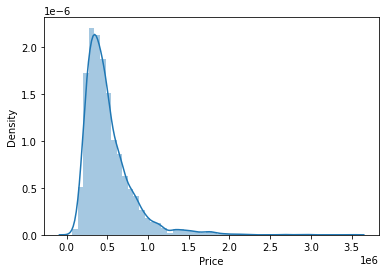

In [246]:
sns.distplot(cars['Price'])

Price is not normally distributed

<AxesSubplot:xlabel='kms', ylabel='Density'>

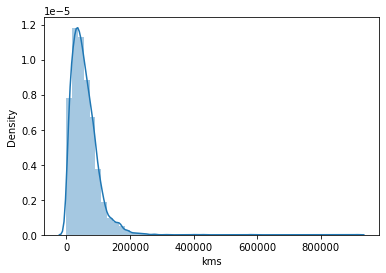

In [247]:
sns.distplot(cars['kms'])

Kms is highly skewed. Let's see the data

In [248]:
cars[cars['kms']>300000]

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
406,maruti,Alto,LXI,2009,Petrol,Manual,428123,2,bengaluru,201099
2064,toyota,Innova,2.5 VX,2014,Diesel,Manual,399905,1,new-delhi,690999
2399,maruti,Wagon R,LXI,2010,Petrol,Manual,578889,1,new-delhi,177699
3339,hyundai,Elite i20,SPORTZ 1.4,2014,Diesel,Manual,912380,1,mumbai,483199
3652,toyota,Innova,2.5 GX,2014,Diesel,Manual,312882,1,mumbai,777099


The data is very less if kms driven is above 300000 kms. We will drop this columns

In [249]:
cars.drop(cars[cars.kms > 300000].index, inplace=True)

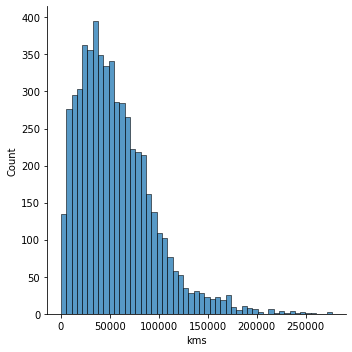

In [250]:
sns.displot(cars['kms'])

The skewness has been reduced a lot

<AxesSubplot:xlabel='Owners', ylabel='Count'>

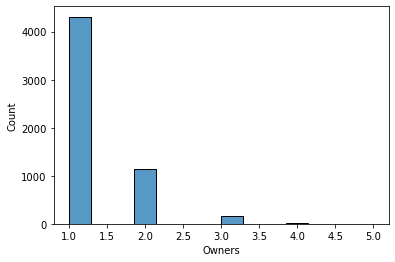

In [251]:
sns.histplot(cars['Owners'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

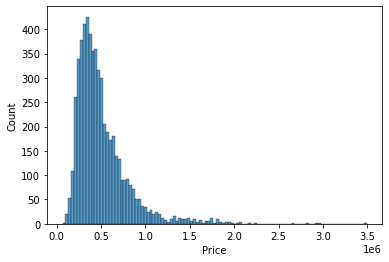

In [252]:
sns.histplot(cars['Price'])

In [253]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,390099
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,419299
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,294199
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,529299
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,374299
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,366499
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,361999
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,324299
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,561999


<AxesSubplot:>

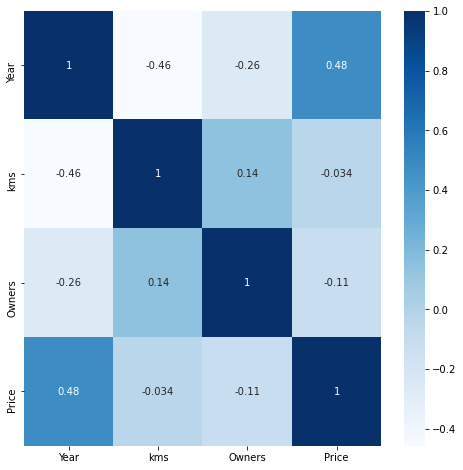

In [254]:
corr=cars.corr()
plt.figure(figsize=(8,8))
sns.heatmap(cars.corr(),annot=True,cmap='Blues')

### Visualization

<AxesSubplot:ylabel='Brands'>

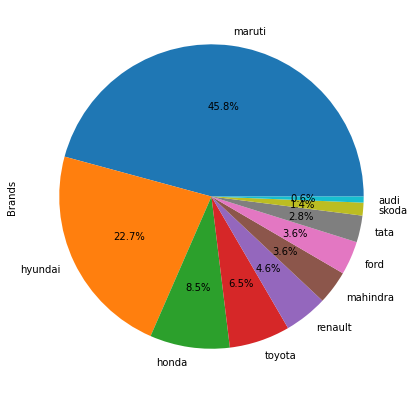

In [255]:
cars['Brands'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

45.8% percent of the data is from Maruti Brand followed by Hyundai

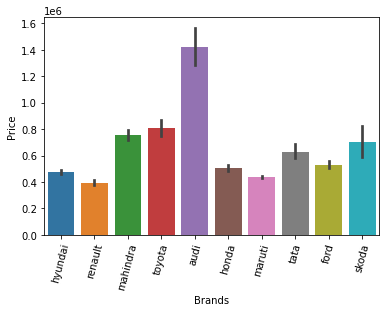

In [256]:
sns.barplot(x='Brands', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Audi is the most expensive of the cars followed by Toyota

<AxesSubplot:ylabel='Year'>

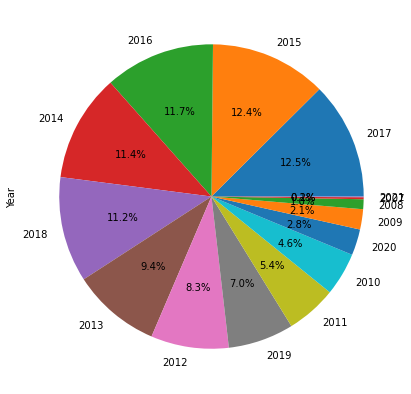

In [257]:
cars['Year'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Cars from make year 2015 and 2017 make 12.4% of the data

<AxesSubplot:ylabel='Fuel'>

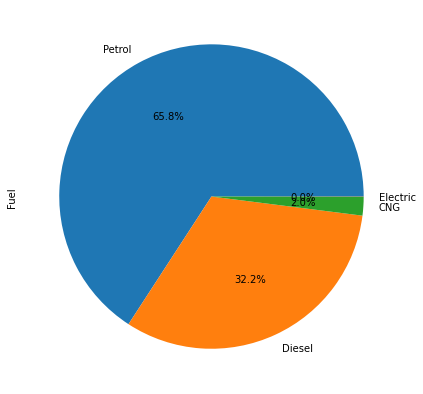

In [258]:
cars['Fuel'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Data has 65.8% cars which are run on petrol

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

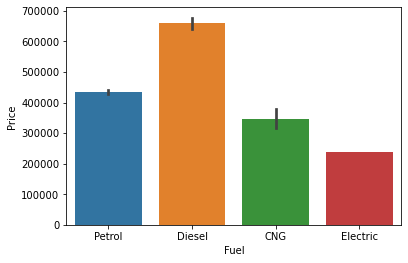

In [259]:
sns.barplot(x='Fuel', y='Price', data = cars)

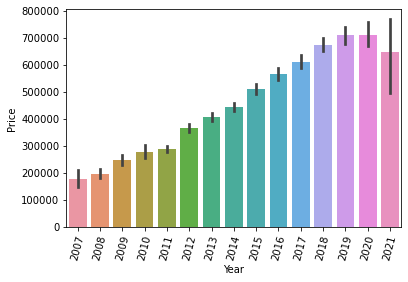

In [260]:
sns.barplot(x='Year', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Price are higher for the newer model

<AxesSubplot:ylabel='Location'>

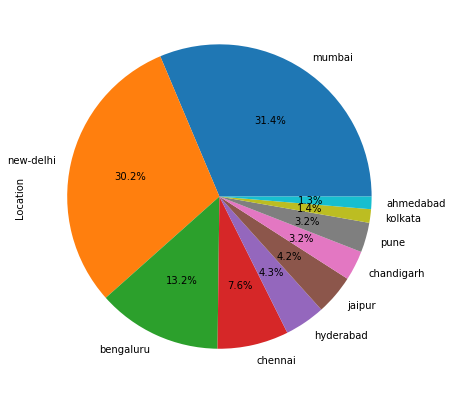

In [261]:
cars['Location'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

More than 60% of the data is from Mumbai and New-Delhi

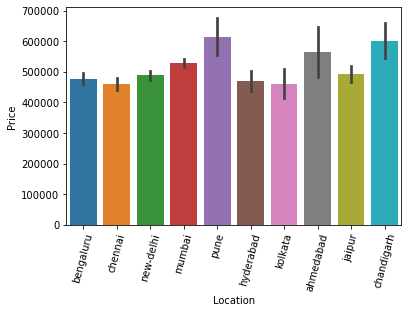

In [262]:
sns.barplot(x='Location', y='Price', data = cars)
plt.xticks(rotation=75)
plt.show()

Price range is lower in Hyderabad and Kolkata

<AxesSubplot:ylabel='Owners'>

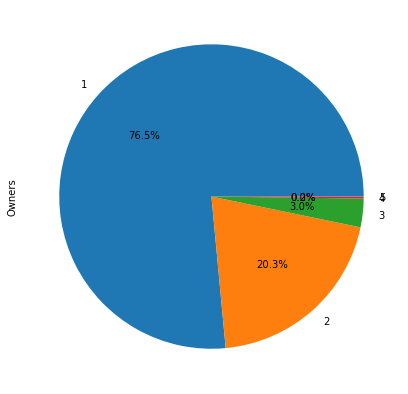

In [263]:
cars['Owners'].value_counts().plot.pie(figsize = (7,7), autopct = '%.1f%%')

Used cars are mostly preferred if there are less owners

<AxesSubplot:xlabel='Owners', ylabel='Price'>

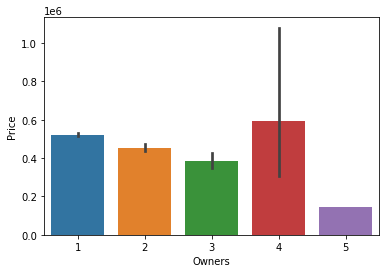

In [264]:
sns.barplot(x='Owners', y='Price', data = cars)

Price is highly corelated with Year

### Feature Engineering

We will check how old the car is by introducing the new column 'Current year'

In [265]:
cars['Current Year']=2021

In [266]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price,Current Year
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,390099,2021
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,419299,2021
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,294199,2021
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,529299,2021
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,374299,2021
...,...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,366499,2021
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,361999,2021
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,324299,2021
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,561999,2021


In [267]:
#we will subtract current year from the make year to check how old car is
cars['no_year']=cars['Current Year']- cars['Year']

In [268]:
cars

,Brands,Model,Variant,Year,Fuel,Transmission,kms,Owners,Location,Price,Current Year,no_year
0,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,16089,2,bengaluru,390099,2021,8
1,hyundai,i10,SPORTZ 1.2,2013,Petrol,Manual,15548,1,bengaluru,419299,2021,8
2,hyundai,Santro Xing,GL PLUS,2011,Petrol,Manual,10252,1,bengaluru,294199,2021,10
3,hyundai,Grand i10,ASTA 1.2,2014,Petrol,Automatic,21727,1,bengaluru,529299,2021,7
4,hyundai,i10,SPORTZ 1.2,2012,Petrol,Manual,43142,1,bengaluru,374299,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,2012,Diesel,Manual,108981,2,chandigarh,366499,2021,9
5864,skoda,Rapid,1.6 TDI,2014,Diesel,Manual,138328,1,chandigarh,361999,2021,7
5865,skoda,Rapid,AMBITION 1.6,2014,Petrol,Manual,134412,1,chandigarh,324299,2021,7
5866,skoda,Rapid,1.5 TDI,2017,Diesel,Automatic,137938,1,chandigarh,561999,2021,4


In [269]:
#since we got the car age we will drop the year and current year column
cars.drop(['Year'],axis=1,inplace=True)
cars.drop(['Current Year'],axis=1,inplace=True)

In [270]:
cars

,Brands,Model,Variant,Fuel,Transmission,kms,Owners,Location,Price,no_year
0,hyundai,i10,SPORTZ 1.2,Petrol,Manual,16089,2,bengaluru,390099,8
1,hyundai,i10,SPORTZ 1.2,Petrol,Manual,15548,1,bengaluru,419299,8
2,hyundai,Santro Xing,GL PLUS,Petrol,Manual,10252,1,bengaluru,294199,10
3,hyundai,Grand i10,ASTA 1.2,Petrol,Automatic,21727,1,bengaluru,529299,7
4,hyundai,i10,SPORTZ 1.2,Petrol,Manual,43142,1,bengaluru,374299,9
...,...,...,...,...,...,...,...,...,...,...
5863,skoda,Yeti,AMBITION 2.0,Diesel,Manual,108981,2,chandigarh,366499,9
5864,skoda,Rapid,1.6 TDI,Diesel,Manual,138328,1,chandigarh,361999,7
5865,skoda,Rapid,AMBITION 1.6,Petrol,Manual,134412,1,chandigarh,324299,7
5866,skoda,Rapid,1.5 TDI,Diesel,Automatic,137938,1,chandigarh,561999,4


In [271]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brands        5636 non-null   object
 1   Model         5636 non-null   object
 2   Variant       5636 non-null   object
 3   Fuel          5636 non-null   object
 4   Transmission  5636 non-null   object
 5   kms           5636 non-null   int32 
 6   Owners        5636 non-null   int64 
 7   Location      5636 non-null   object
 8   Price         5636 non-null   int32 
 9   no_year       5636 non-null   int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 600.3+ KB


In [272]:
#changing the categorical feature to numerical

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cars.columns:
    if cars[i].dtypes==object:
        cars[i]=le.fit_transform(cars[i])

In [273]:
cars

,Brands,Model,Variant,Fuel,Transmission,kms,Owners,Location,Price,no_year
0,3,115,289,3,1,16089,2,1,390099,8
1,3,115,289,3,1,15548,1,1,419299,8
2,3,85,191,3,1,10252,1,1,294199,10
3,3,48,144,3,0,21727,1,1,529299,7
4,3,115,289,3,1,43142,1,1,374299,9
...,...,...,...,...,...,...,...,...,...,...
5863,7,112,141,1,1,108981,2,2,366499,9
5864,7,78,80,1,1,138328,1,2,361999,7
5865,7,78,140,3,1,134412,1,2,324299,7
5866,7,78,59,1,0,137938,1,2,561999,4


We are now going to split the data between input and target variable.

In [274]:
x=cars.drop(['Price'],axis=1)
y=cars['Price']
y=pd.DataFrame(data=y)

In [275]:
x.shape

(5636, 9)

In [276]:
y.shape

(5636, 1)

### Model Fitting and Selection

Importing all the libraries for model fitting and cross validation.

In [277]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will check the best possible random state to train our model. Using LinearRegression to check and then later will run with other models.

In [278]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 146 is 0.5149891249707013


We can see that the best random state is 146. We will split the data with this random state.

In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=146)

In [283]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

-0.001043908137905225
-0.06256743309875668
-0.0631993522152352


In [288]:
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=146, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,43.700949,51.498912,4.438403e+10,44.909230
1,DecisionTree,99.999517,77.767045,2.034569e+10,79.772927
2,RandomForest,98.529566,89.394377,9.705356e+09,88.433244
3,KNN,31.160416,-5.573179,9.661151e+10,-6.955736
4,AdaBoost,47.512620,53.008588,4.300251e+10,41.626435
5,GradientBoosting,87.599001,85.153205,1.358651e+10,83.484711
6,Lasso,43.700949,51.498719,4.438421e+10,44.909236
7,Ridge,43.700904,51.488676,4.439340e+10,44.909682


In [289]:
Performance['Difference']=Performance['Test Score']-Performance['Cross Validation Score']

In [290]:
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score,Difference
0,Linear Regression,43.700949,51.498912,4.438403e+10,44.909230,6.589682
1,DecisionTree,99.999517,77.767045,2.034569e+10,79.772927,-2.005882
2,RandomForest,98.529566,89.394377,9.705356e+09,88.433244,0.961134
3,KNN,31.160416,-5.573179,9.661151e+10,-6.955736,1.382557
4,AdaBoost,47.512620,53.008588,4.300251e+10,41.626435,11.382152
5,GradientBoosting,87.599001,85.153205,1.358651e+10,83.484711,1.668494
6,Lasso,43.700949,51.498719,4.438421e+10,44.909236,6.589483
7,Ridge,43.700904,51.488676,4.439340e+10,44.909682,6.578994


#### RandomForest has given us the best test accuracy of 89% with CV score of 88%
#### We will select this as our final model and Hypertune it

### HyperTuning
Importing the libraries for Hypertuning.

In [291]:
from sklearn.model_selection import GridSearchCV

In [292]:
parameters1 = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4, 6],
                  'min_samples_split': [2, 5, 10, 15],
                  'n_estimators': [5, 10, 20, 30, 50, 100]}

In [293]:
GCV1=GridSearchCV(RandomForestRegressor(),parameters1,cv=3)
GCV1.fit(x_train,y_train)

print(GCV1.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


We will now fit thw above parameters with the model.

In [294]:
Finalmod1=RandomForestRegressor(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 50)
Finalmod1.fit(x_train,y_train)
pred_test1=Finalmod1.predict(x_test)
RF_R2=r2_score(y_test,pred_test1)
RF_scores=cross_val_score(Finalmod1,x,y,cv=kf)
RF_MSE = mean_squared_error(y_test,pred_test1)
print('RandomForestRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', RF_R2*100)
print('Cross Validation score',RF_scores.mean()*100)
print('Mean Square Error',RF_MSE)

RandomForestRegressor Performance
---------------------------------------------------
Accuracy Score 91.20503077441113
Cross Validation score 88.48573117715081
Mean Square Error 8048400894.172803


#### Our model performance has increased slightly

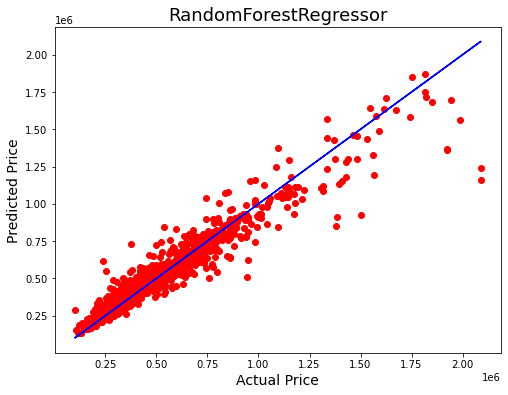

In [295]:
#Plotting the model

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test1,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

Our model is fitting well.

In [296]:
#there is a slight improve in the accuracy after hypertuning the model
#lets dump the model
import joblib
joblib.dump(Finalmod1,'Car_price.obj')

['Car_price.obj']

##### Completed